# 미니프로젝트 2차 회의 결과 분석 데이터 최종

*   사용된 데이터 - https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset?select=framingham.csv
*   data preprocessing을 통해 자료의 특성을 파악/정리

[진행 과정]
1. 5개 변수 결측값 대체 (cigPerday ; 수연 /totchol, bpmeds ;민영/ glucose, bmi;은주)

[2차 회의내용 참고사항]
- 결측치를 다 median 값으로 했음. (imputation을 그룹화해서 하면 좋을 듯.)
- 하루 평균 담배량은 성별로 유의한 차이가 있으므로 성별 median으로 결측치 대체
- age 변수를 구간화하고 최종 데이터 set 만들어냄.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [88]:
#변수 살펴보기
data=pd.read_csv("C:/Users/SAMSUNG/Desktop/framingham2.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 18 columns):
Unnamed: 0         4185 non-null int64
Unnamed: 0.1       4185 non-null int64
male               4185 non-null int64
age                4185 non-null int64
currentSmoker      4185 non-null int64
cigsPerDay         4156 non-null float64
BPMeds             4185 non-null int64
prevalentStroke    4185 non-null int64
prevalentHyp       4185 non-null int64
diabetes           4185 non-null int64
totChol            4185 non-null float64
sysBP              4185 non-null float64
diaBP              4185 non-null float64
BMI                4185 non-null float64
heartRate          4185 non-null float64
glucose            4185 non-null float64
TenYearCHD         4185 non-null int64
BMI_rank           4185 non-null float64
dtypes: float64(8), int64(10)
memory usage: 588.6 KB


In [89]:
# 결측치 빈도
data.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
male                0
age                 0
currentSmoker       0
cigsPerDay         29
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
BMI_rank            0
dtype: int64

In [90]:
#겹치는 변수 - 흡연여부, 나이, 성별, bmi
#나이의 범위 - 32세~70세 (조정됨)
data['age'].describe()

count    4185.000000
mean       46.896057
std         9.653482
min        30.000000
25%        40.000000
50%        45.000000
75%        55.000000
max        69.000000
Name: age, dtype: float64

In [91]:
a = data[data['currentSmoker']==1]
b = data[data['currentSmoker']==0]

위 결과에 따라 cigsPerday의 모든 결측은 흡연자일 경우만 해당됨.

In [92]:
# 흡연자에 대한 median값으로 결측값을 채움.
#data.cigsPerDay.fillna(data.cigsPerDay.where(data.currentSmoker==1).median(),inplace=True)

https://www.kaggle.com/shikhnu/ensemble-learning-stacking-algorithm

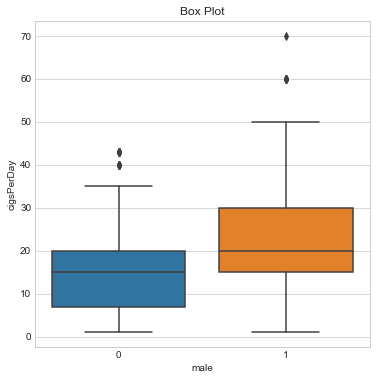

In [94]:
import seaborn as sns

# 화면 스타일 설정하기
sns.set_style("whitegrid")

plt.figure(figsize=(6, 6))
sns.boxplot(x='male', y='cigsPerDay', data=a)
plt.title("Box Plot")
plt.show()

성별로 흡연자의 하루평균담배량의 유의한 차이가 있음을 확인.

In [95]:
# 흡연자에 대한 median값으로 결측값을 채움. 남자는 20, 여자는 15로
fill_values = {1: 20, 0: 15}
fill_func = lambda d: d.fillna(fill_values[d.name])
data=data.groupby('male').apply(fill_func)
data=data.drop(['Unnamed: 0','Unnamed: 0.1'],axis='columns')

In [97]:
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BMI_rank
0,0,32,1,15.0,0,0,0,0,242.0,111.0,70.0,29.84,80.0,0.404817,0,2.0
1,1,30,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,0.384412,0,2.0
2,0,45,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,0.382358,0,2.0
3,1,45,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,0.369192,0,2.0
4,0,60,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,0.427603,1,2.0
5,0,45,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,0.399616,0,1.0
6,0,40,0,0.0,0,0,1,0,228.0,180.0,110.0,30.30,77.0,0.421991,0,3.0
7,0,60,0,0.0,0,0,0,0,205.0,138.0,71.0,33.11,60.0,0.399616,1,3.0
8,0,45,1,20.0,0,0,0,0,313.0,100.0,71.0,21.68,79.0,0.386430,0,1.0
9,1,50,0,0.0,0,0,1,0,260.0,141.5,89.0,26.36,76.0,0.388412,0,2.0


In [98]:
#age를 구간화
bins = [29,39,49,59,69] # 구간을 설정한다. (30~39, ... , 60~69)
bins_names = ['30대', '40대', '50대', '60대'] # 구간별 이름
categories = pd.cut(data['age'], bins, labels=bins_names)

In [99]:
data=data.drop(['age'],axis='columns')

In [100]:
data=pd.concat([data,categories],axis=1)
data.head(10)

,male,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BMI_rank,age
0,0,1,15.0,0,0,0,0,242.0,111.0,70.0,29.84,80.0,0.404817,0,2.0,30대
1,1,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,0.384412,0,2.0,30대
2,0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,0.382358,0,2.0,40대
3,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,0.369192,0,2.0,40대
4,0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,0.427603,1,2.0,60대
5,0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,0.399616,0,1.0,40대
6,0,0,0.0,0,0,1,0,228.0,180.0,110.0,30.30,77.0,0.421991,0,3.0,40대
7,0,0,0.0,0,0,0,0,205.0,138.0,71.0,33.11,60.0,0.399616,1,3.0,60대
8,0,1,20.0,0,0,0,0,313.0,100.0,71.0,21.68,79.0,0.386430,0,1.0,40대
9,1,0,0.0,0,0,1,0,260.0,141.5,89.0,26.36,76.0,0.388412,0,2.0,50대


In [101]:
data.to_csv("C:/Users/SAMSUNG/Desktop/framingham3.csv",header=True,index=False)